In [10]:
import numpy as np 
import operator

In [11]:
def createDatasets():
    group = np.array([[1, 101], 
                      [5, 89], 
                      [108, 5], 
                      [115, 8]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [26]:
def classify0(inX, dataSet, labels, k):
    '''
    inX: new data without label
    dataSet: data for training
    labels: labels for training
    k: k for kNN
    '''
    # 将新数据重复扩展，和训练数据同维度
    # 分别计算新数据点到各个训练数据点的欧式距离
    # 按照欧式距离值进行排序
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    sortedDistances = distances.argsort()
    # 用前k个最近的数据点的label进行投票
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistances[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    # 根据投票结果，即字典的value项反向排序，返回第一个
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [13]:
group, labels = createDatasets()
test = [101, 20]
test_class = classify0(test, group, labels, 3)
print(test_class)

B


In [14]:
import matplotlib.pyplot as plt 
import matplotlib.lines as mlines

In [15]:
def file2matrix(filename):
	fr = open(filename)
	arrayOfLines = fr.readlines()
	numberOfLines = len(arrayOfLines)
	retMat = np.zeros((numberOfLines, 3))
	classLabelVector = []
	index = 0
	for line in arrayOfLines:
		line = line.strip()
		listFromLine = line.split('\t')
		retMat[index, :] = listFromLine[0: 3]
		if listFromLine[-1] == 'didntLike':
			classLabelVector.append(1)
		elif listFromLine[-1] == 'smallDoses':
			classLabelVector.append(2)
		elif listFromLine[-1] == 'largeDoses':
			classLabelVector.append(3)
		index += 1
	return retMat, classLabelVector

In [22]:
def showdatas(datingDataMat, datingLabels):
	fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(16, 10))
	numberOfLabels = len(datingLabels)
	LabelsColors = []
	for i in datingLabels:
		if i == 1:
			LabelsColors.append('black')
		if i == 2:
			LabelsColors.append('orange')
		if i == 3:
			LabelsColors.append('red')

	axs[0][0].scatter(x=datingDataMat[:, 0], y=datingDataMat[:, 1], color=LabelsColors, s=15, alpha=.5)
	axs[0][0].set_title('Flight Mileage - Gaming Time')
	axs[0][0].set_xlabel('flight mileage')
	axs[0][0].set_ylabel('gaming time')

	axs[0][1].scatter(x=datingDataMat[:, 0], y=datingDataMat[:, 2], color=LabelsColors, s=15, alpha=.5)
	axs[0][1].set_title('Flight Mileage - Ice Cream Litres')
	axs[0][1].set_xlabel('flight mileage')
	axs[0][1].set_ylabel('ice cream litres')

	axs[1][0].scatter(x=datingDataMat[:, 1], y=datingDataMat[:, 2], color=LabelsColors, s=15, alpha=.5)
	axs2_title_text = axs[1][0].set_title('Gaming Time - Ice Cream Litres')
	axs2_xlabel_text = axs[1][0].set_xlabel('gaming time')
	axs2_ylabel_text = axs[1][0].set_ylabel('ice cream litres')

	didntLike = mlines.Line2D([], [], color='black', marker='.', markersize=6, label='didntLike')
	smallDoses = mlines.Line2D([], [], color='orange', marker='.', markersize=6, label='smallDoses')
	largeDoses = mlines.Line2D([], [], color='red', marker='.', markersize=6, label='largeDoses')

	axs[0][0].legend(handles=[didntLike, smallDoses, largeDoses])
	axs[0][1].legend(handles=[didntLike, smallDoses, largeDoses])
	axs[1][0].legend(handles=[didntLike, smallDoses, largeDoses])

	plt.show()

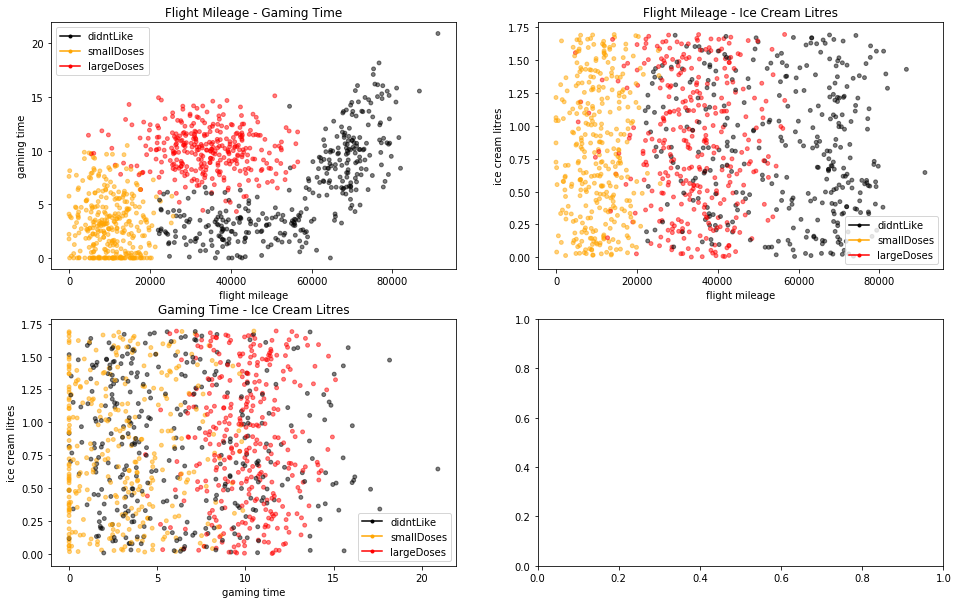

In [23]:
filename = "datingTestSet.txt"
datingDataMat, datingLabels = file2matrix(filename)
showdatas(datingDataMat, datingLabels)

In [24]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

In [25]:
normDataSet, ranges, minVals = autoNorm(datingDataMat)
print(normDataSet)
print(ranges)
print(minVals)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
[9.1273000e+04 2.0919349e+01 1.6943610e+00]
[0.       0.       0.001156]


In [29]:
def datingClassTest():
    filename = "datingTestSet.txt"
    datingDataMat, datingLabels = file2matrix(filename)
    hoRatio = 0.10
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i, :],
                                     normMat[numTestVecs:m, :],
                                     datingLabels[numTestVecs:m],
                                     4)
        print('Prediction: %d\tTruth: %d' % (classifierResult, datingLabels[i]))
        if classifierResult != datingLabels[i]:
            errorCount += 1.0
            
    print('Error Rate: %f' % (errorCount / float(numTestVecs)))

In [30]:
datingClassTest()

Prediction: 3	Truth: 3
Prediction: 2	Truth: 2
Prediction: 1	Truth: 1
Prediction: 1	Truth: 1
Prediction: 1	Truth: 1
Prediction: 1	Truth: 1
Prediction: 3	Truth: 3
Prediction: 3	Truth: 3
Prediction: 1	Truth: 1
Prediction: 3	Truth: 3
Prediction: 1	Truth: 1
Prediction: 1	Truth: 1
Prediction: 2	Truth: 2
Prediction: 1	Truth: 1
Prediction: 1	Truth: 1
Prediction: 1	Truth: 1
Prediction: 1	Truth: 1
Prediction: 1	Truth: 1
Prediction: 2	Truth: 2
Prediction: 3	Truth: 3
Prediction: 2	Truth: 2
Prediction: 1	Truth: 1
Prediction: 2	Truth: 2
Prediction: 3	Truth: 3
Prediction: 2	Truth: 2
Prediction: 3	Truth: 3
Prediction: 2	Truth: 2
Prediction: 3	Truth: 3
Prediction: 2	Truth: 2
Prediction: 1	Truth: 1
Prediction: 3	Truth: 3
Prediction: 1	Truth: 1
Prediction: 3	Truth: 3
Prediction: 1	Truth: 1
Prediction: 2	Truth: 2
Prediction: 1	Truth: 1
Prediction: 1	Truth: 1
Prediction: 2	Truth: 2
Prediction: 3	Truth: 3
Prediction: 3	Truth: 3
Prediction: 1	Truth: 1
Prediction: 2	Truth: 2
Prediction: 3	Truth: 3
Prediction:

In [31]:
def classifyPerson():
    resultList = ['dislike', 'kind of like', 'very like']
    precentTats = float(input('Proportion of gaming time:'))
    ffMiles = float(input('Annual flight mileage:'))
    iceCream = float(input('Weekly litres of ice cream:'))
    filename = "datingTestSet.txt"
    datingDataMat, datingLabels = file2matrix(filename)
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = np.array([precentTats, ffMiles, iceCream])
    norminArr = (inArr - minVals) / ranges
    classifierRseult = classify0(norminArr, normMat, datingLabels, 3)
    print('You may %s this person.' % (resultList[classifierRseult-1]))

In [32]:
classifyPerson()

Proportion of gaming time:12
Annual flight mileage:44000
Weekly litres of ice cream:0.5
You may dislike this person.
